## This is a calibration for the ion position on the screen (LB) due to the shift for the magnetic field.
As the magnetic field and electric field are independent and applied along the same direction in the TP box and the 
force due to the magnetic field and electric field are mutually orthogonal, the shift due to the magnetic field don't even need to 
take account the impact for the electric field. 

In [47]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 26 11:55:40 2025

@author: mrsag
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import scipy.integrate as integrate
from Curve_fitting_with_scipy import polynomial_fit as pft
import glob

import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['font.size'] = 12
#mpl.rcParams['font.weight'] = 'bold'
#mpl.rcParams['font.style'] = 'italic'  # Set this to 'italic'
mpl.rcParams['figure.dpi']=300 # highres display

In [48]:
# Defining constants:
cm = 1e-2
mm = 1e-3
e = 1.6e-19
me = 9.11e-31
keV_to_Joule = 1.6e-16
c=3e8  # in SI unit

In [49]:
B_field = 0.45 # Magnetic Field (B)  (in Tesla)
lB = 5*cm  # Magnetic field length (lB)  (in cm)
DB = (32.3+1.75)*cm # Distance of screen from magnetic field region endpoint (DB)  (in cm)
qp = 1*e # Charge of proton in terms of proton charge (q)
mH = 1836*me # Mass of particle (in terms of electron mass)

In [50]:
@np.vectorize
def radius_of_curvature(energy,m=mH,q=qp,B=B_field):
    f1=(m*c)/(q*B)
    f2=np.sqrt((1+energy/(m*c**2))**2-1)
    R = f1*f2
    return R

In [51]:
@np.vectorize
def magnetic_shift(energy,DB=DB,lB=lB,m=mH,q=qp,B=B_field):
    R = radius_of_curvature(energy,m,q,B)
    l1 = R-np.sqrt(R**2-lB**2)
    l2 = lB*DB/np.sqrt(R**2-lB**2)
    L = l1+l2
    return L

In [52]:
energy = np.linspace(100,80000,800)*keV_to_Joule
LB = magnetic_shift(energy=energy,DB=DB,lB=lB,m=mH,q=qp,B=B_field)

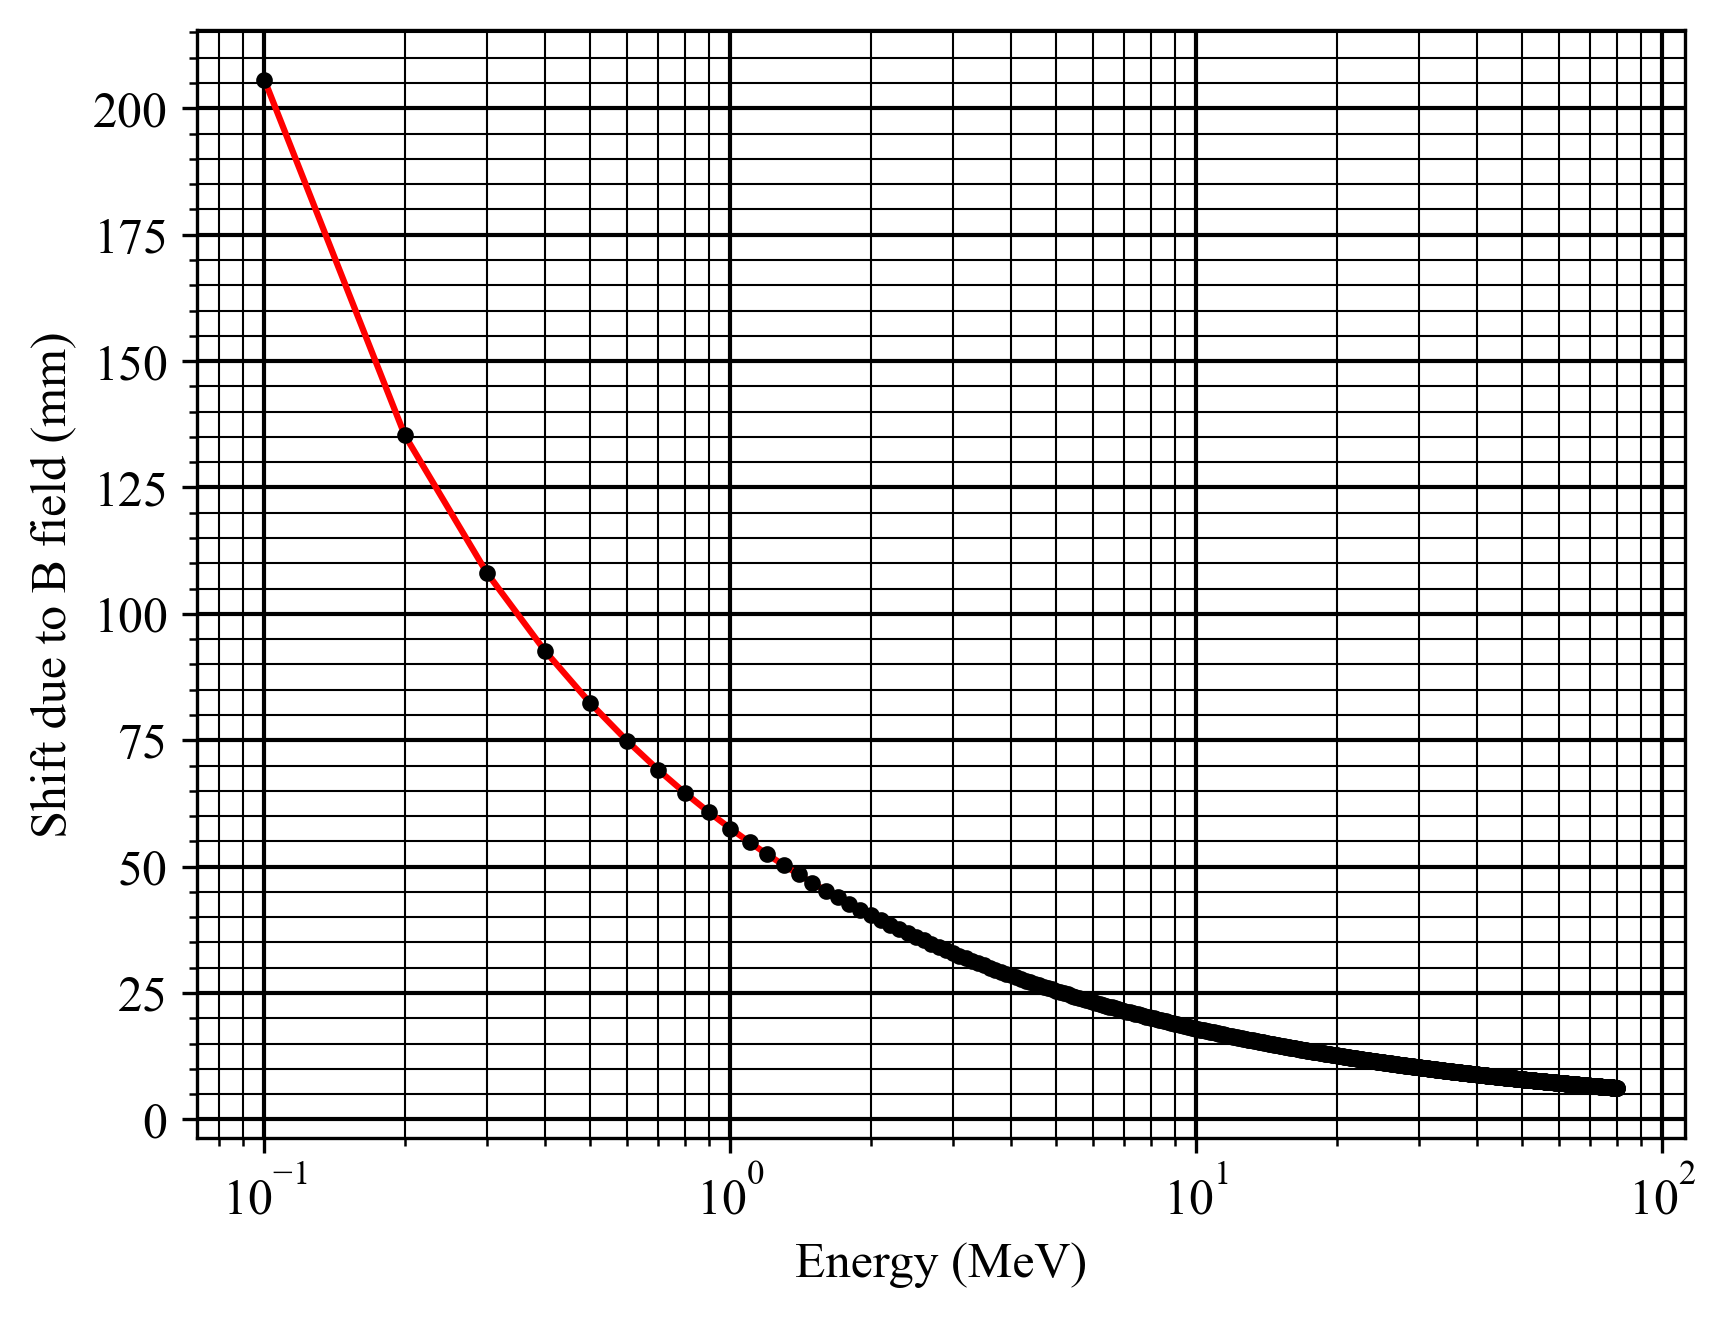

In [57]:
# plt.figure(figsize=(2,1))
plt.plot(energy/keV_to_Joule/1e3,LB/mm,"r-")
plt.plot(energy/keV_to_Joule/1e3,LB/mm,"ko",markersize=3)
plt.xlabel("Energy (MeV)")
plt.ylabel("Shift due to B field (mm)")
plt.xscale("log")
# plt.yscale("log")
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth=1, color='k')
plt.grid(which='minor', linestyle='-', linewidth=0.5, color='k')
plt.show()